<a href="https://colab.research.google.com/github/programmerfaz/Machine-learning-Projects/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction using support vector machine algorithm

Support vector machine learning algorithm is a supervised machine learning model which learns from the labelled data. In this we train our model based on various features like glucose, blood level, insulin level etc.

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

Data collection and analysis

PIMA Diabetes Dataset which contains the diabetes data of only females.

In [4]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/DATASET/Diabetes/diabetes.csv')

In [5]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here the outcome is a classified variable which means the data is classified into two that is the patient can either have diabetes (1) or non diabetic (0)

In [8]:
#getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset.shape

(768, 9)

In [9]:
#counting the number of diabetic and non diabetic patients
diabetes_dataset["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non diabetic

1 --> Diabetic

In [10]:
#Fetching the mean of diabetic and non diabetic patients
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
#Separating the data and the labels
X = diabetes_dataset.drop(columns = "Outcome",axis=1)
Y = diabetes_dataset["Outcome"]

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization- we standardize the data as a part of pre processing which means making all the data to be in a particular range for the model to predict the values more accurately.

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X,Y)

StandardScaler()

In [18]:
standardized_data = scaler.transform(X)

In [23]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [25]:
X = standardized_data #Now X contains the standardized data with similar range
Y = diabetes_dataset["Outcome"]

In [26]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [27]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train test and split data

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [31]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


Training the model

In [33]:
classifier = svm.SVC(kernel="linear")

In [34]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

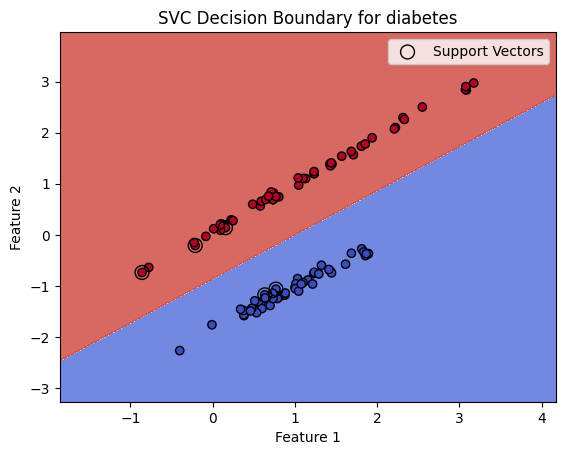

In [53]:
#plotting the graph
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict for every point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Highlight support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("SVC Decision Boundary for diabetes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Evaluating the model

Accuracy score

In [38]:
#accuracy score for the training data
X_train_prediction = classifier.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)

In [40]:
print(X_train_accuracy*100)

78.66449511400651


In [41]:
#accuracy score for testing data
X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)

In [42]:
print(X_test_accuracy*100)

77.27272727272727


From the above results it is clear that that accuracy score of our training data is 78% where as for the testing data it is 77%.

Making a predictive system

In [63]:
input_data = (6,148,72,35,0,33.6,0.627,50)

#coverting the data to numpy array
np_data = np.asarray(input_data)

# Convert the input data to a DataFrame with matching column names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input_df = pd.DataFrame([input_data], columns=columns)

#standardizing the converrted data
std_data = scaler.transform(input_df)
# print(std_data)

prediction = classifier.predict(std_data)
# print(prediction)
if (prediction[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

The person is diabetic


In [64]:
input_data = (4,110,92,0,0,37.6,0.191,30)

#coverting the data to numpy array
np_data = np.asarray(input_data)

# Convert the input data to a DataFrame with matching column names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input_df = pd.DataFrame([input_data], columns=columns)

#standardizing the converted data
std_data = scaler.transform(input_df)
# print(std_data)

prediction = classifier.predict(std_data)
# print(prediction)
if (prediction[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

The person is not diabetic
